Translating the R sequences from https://arxiv.org/abs/1611.09477 into Python vtreat https://github.com/WinVector/pyvtreat

R original

Python translation

In [1]:
import pandas
import numpy
import numpy.random
import vtreat # https://github.com/WinVector/pyvtreat


freetrade = pandas.read_csv('freetrade.csv')
freetrade.head()

,year,country,tariff,polity,pop,gdp.pc,intresmi,signed,fiveop,usheg
0,1981,SriLanka,NaN,6.0,14988000,461.023590,1.937347,0.0,12.4,0.259311
1,1982,SriLanka,NaN,5.0,15189000,473.763397,1.964430,0.0,12.5,0.255801
2,1983,SriLanka,41.299999,5.0,15417000,489.226562,1.663936,1.0,12.3,0.265502
3,1984,SriLanka,NaN,5.0,15599000,508.173920,2.797462,0.0,12.3,0.298801
4,1985,SriLanka,31.000000,5.0,15837000,525.560852,2.259116,0.0,12.3,0.295243


In [2]:
freetrade.dtypes

year          int64
country      object
tariff      float64
polity      float64
pop           int64
gdp.pc      float64
intresmi    float64
signed      float64
fiveop      float64
usheg       float64
dtype: object

R original

Python version

In [9]:
import seaborn

def compRsq(d, x, y):
    meany = numpy.mean(d[y])
    rsq = 1-numpy.sum((d[y]-d[x])**2)/numpy.sum((d[y]-meany)**2)
    return rsq


def plotFit(d, x, y, title):
    rsq = compRsq(d, x, y)
    title = title + "\nR-squared: " + '{:.3f}'.format(rsq)
    seaborn.scatterplot(x=x, y=y, data=d).set_title(title)

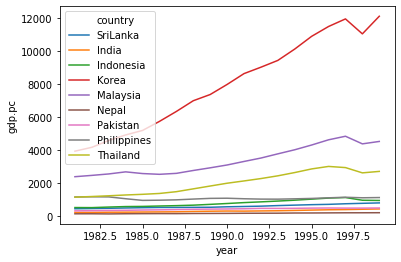

In [4]:
plotFrame =freetrade
sortFrame = plotFrame.loc[plotFrame['year']==1989, ]
seaborn.lineplot(x='year', y='gdp.pc', data=plotFrame, hue='country')

R origninal

Python version

In [5]:
## ----LookFTDefGoal1------------------------------------------------------

In [6]:
trainData = freetrade.loc[freetrade['year']<1990, :].copy()
testData = freetrade.loc[freetrade['year']>=1990, :].copy()
origVars = ['tariff', 'polity', 'pop', 'year', 'country']

In [7]:
## ----ModelPast2, echo=FALSE, warning=FALSE, message=FALSE, fig.width=6, fig.height=3----

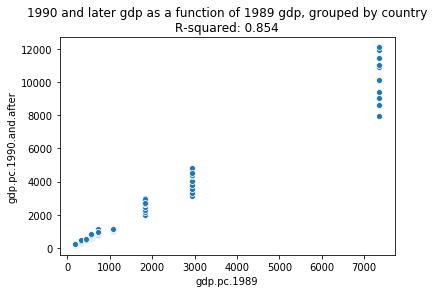

In [10]:
paired = freetrade.loc[freetrade['year']==1989, ['country', 'year', 'gdp.pc']].merge(
               freetrade.loc[freetrade['year']>=1990, ['country', 'year', 'gdp.pc']], 
               on='country', 
               suffixes=['.1989', '.1990.and.after'])
plotFit(paired, 'gdp.pc.1989', 'gdp.pc.1990.and.after', 
                     '1990 and later gdp as a function of 1989 gdp, grouped by country')

R original